## Movie Genre Classification using various classifiers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Reading training dataset
train_data = pd.read_csv("train_data.txt", sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [3]:
# Reading testing dataset
test_data = pd.read_csv("test_data.txt", sep=":::", names=["ID", "TITLE", "DESCRIPTION"], engine="python")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [4]:
# Define a list of colors for each genre, matching the number of unique genres
genre_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
                '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
                '#7f7f7f', '#c7c7c7', '#dbdb8d', '#9edae5', '#17becf',
                '#aec7e8', '#ffbb78', '#98df8a'][:len(train_data["GENRE"].value_counts())]

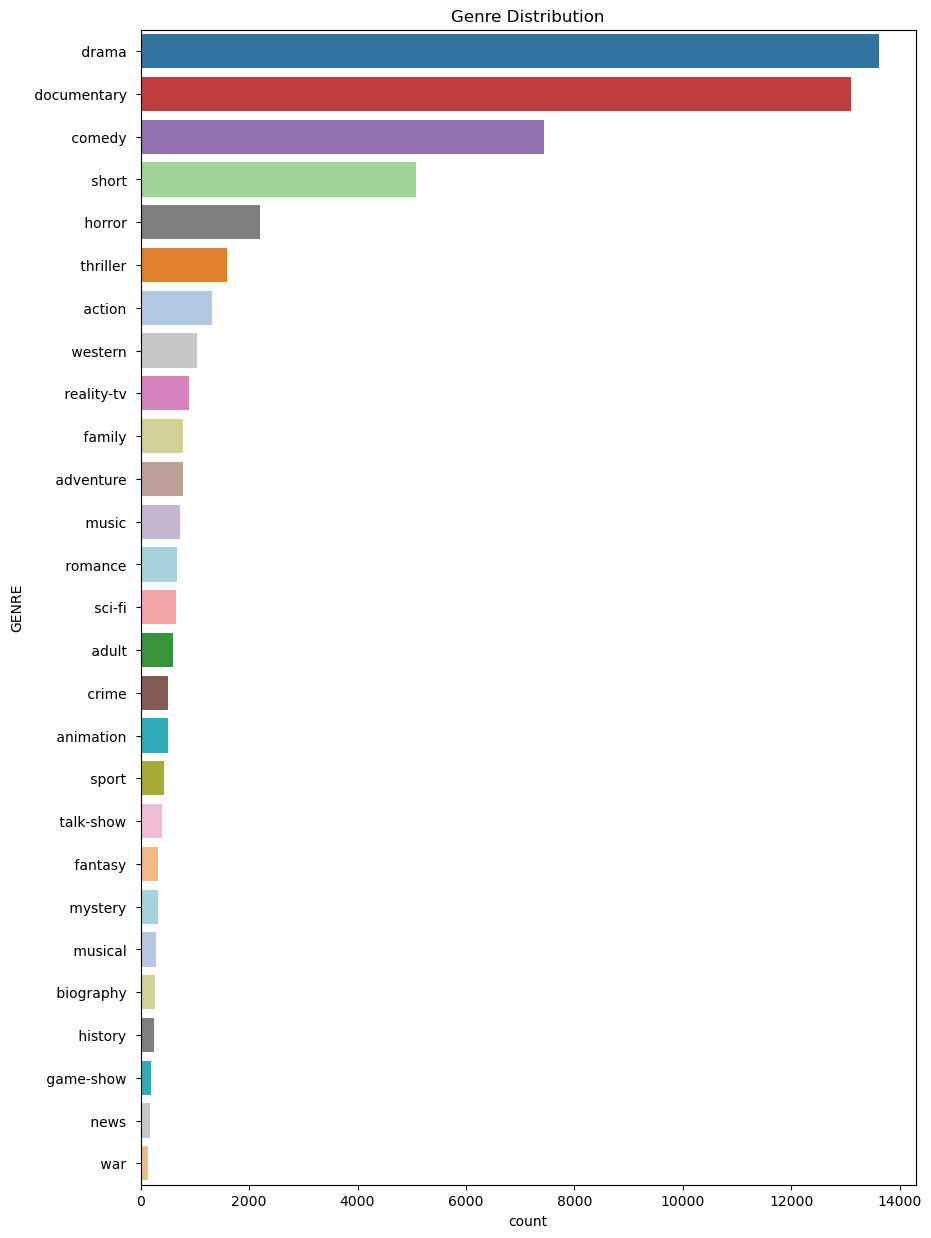

In [5]:
# Visualize Genre Count Plot with custom color palette and specifying hue
plt.figure(figsize=(10, 15))
sns.countplot(data=train_data, y="GENRE", order=train_data["GENRE"].value_counts().index, palette=genre_colors, hue="GENRE", legend=False)
plt.title("Genre Distribution")
plt.show()


In [6]:
# Data Cleaning
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

In [7]:
def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+|http\S+|.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = nltk.word_tokenize(text)
    text = " ".join([word for word in words if word not in stop_words and len(word) > 2])
    return text

In [8]:
train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

In [9]:
# Using TF-IDF to vectorize the data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data["TextCleaning"])
X_test = vectorizer.transform(test_data["TextCleaning"])

In [10]:
# Splitting the data into train and test sets
X = X_train
y = train_data["GENRE"]

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train and Evaluate Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_nb_pred = nb_model.predict(X_val)

In [14]:
nb_accuracy = accuracy_score(y_val, y_nb_pred)
print("Naive Bayes Validation Accuracy:", nb_accuracy * 100)

Naive Bayes Validation Accuracy: 44.52642257677765


In [15]:
# Train and Evaluate Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_lr_pred = lr_model.predict(X_val)

In [17]:
lr_accuracy = accuracy_score(y_val, y_lr_pred)
print("Logistic Regression Validation Accuracy:", lr_accuracy * 100)

Logistic Regression Validation Accuracy: 57.48409111869409


In [18]:
# Comparing Models
model_accuracies = {
    'Naive Bayes': nb_accuracy * 100,
    'Logistic Regression': lr_accuracy * 100,
}

In [19]:
model_names = list(model_accuracies.keys())
model_scores = list(model_accuracies.values())

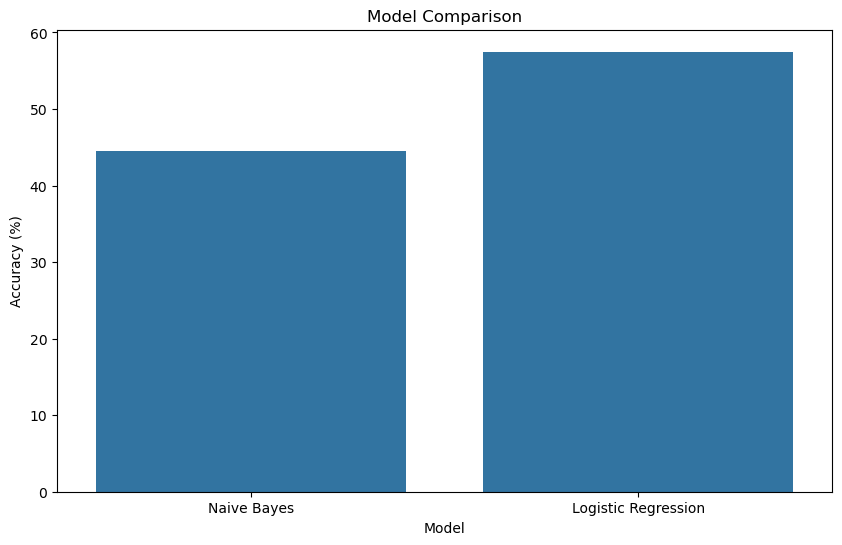

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=model_scores)
plt.title("Model Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")
plt.show()

In [21]:
# Predicting the test set using the best model (assuming it's Logistic Regression here)
test_data["PREDICTED_GENRE"] = lr_model.predict(X_test)

In [22]:
# Display test data with predictions
print(test_data[["ID", "TITLE", "PREDICTED_GENRE"]])

          ID                             TITLE PREDICTED_GENRE
0          1             Edgar's Lunch (1998)           drama 
1          2         La guerra de papá (1977)           drama 
2          3      Off the Beaten Track (2010)     documentary 
3          4           Meu Amigo Hindu (2015)           drama 
4          5                Er nu zhai (1955)           drama 
...      ...                               ...             ...
54195  54196   "Tales of Light & Dark" (2013)           drama 
54196  54197      Der letzte Mohikaner (1965)           drama 
54197  54198              Oliver Twink (2007)          comedy 
54198  54199                Slipstream (1973)           drama 
54199  54200        Curitiba Zero Grau (2010)           drama 

[54200 rows x 3 columns]
